In [ ]:
import pandas as pd
df = pd.read_csv("Finance_Accounting_Dataset.csv")

In [ ]:
df.head(4)


,Revenue,Expenses,Profit,Assets,Liabilities,Debt_Ratio,Market_Cap,Share_Price,Industry,Region,Company_Size,Listing_Status
0,599342.83,381928.52,217414.31,811256.98,212105.53,0.26,9573953.58,200.16,Retail,Asia,Large,Private
1,472347.14,258180.96,214166.18,1405080.99,1206188.63,0.86,4503274.25,57.08,Retail,Asia,Small,Listed
2,629537.71,476363.70,153174.01,920725.26,796792.82,0.87,8929831.13,140.76,Finance,Asia,Large,Listed
3,804605.97,575626.76,228979.21,1036227.71,571144.28,0.55,5821062.69,114.78,Retail,Africa,Large,Private


In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Revenue         20000 non-null  float64
 1   Expenses        20000 non-null  float64
 2   Profit          20000 non-null  float64
 3   Assets          20000 non-null  float64
 4   Liabilities     20000 non-null  float64
 5   Debt_Ratio      20000 non-null  float64
 6   Market_Cap      20000 non-null  float64
 7   Share_Price     20000 non-null  float64
 8   Industry        20000 non-null  object 
 9   Region          20000 non-null  object 
 10  Company_Size    20000 non-null  object 
 11  Listing_Status  20000 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.8+ MB
None


In [ ]:
# Display summary statistics for numerical columns
print(df.describe())

            Revenue      Expenses         Profit        Assets   Liabilities  \
count  2.000000e+04  2.000000e+04   20000.000000  2.000000e+04  2.000000e+04   
mean   5.011398e+05  3.016407e+05  199499.143892  1.001656e+06  4.998975e+05   
std    2.004485e+05  2.055945e+05   49897.602830  4.020218e+05  3.209516e+05   
min   -2.844800e+05 -5.277720e+05  -23280.190000 -7.181564e+05 -3.153551e+05   
25%    3.667446e+05  1.629290e+05  165070.520000  7.323767e+05  2.404339e+05   
50%    5.015401e+05  3.006901e+05  199638.300000  1.003682e+06  4.407860e+05   
75%    6.363814e+05  4.398163e+05  233580.432500  1.275389e+06  7.070500e+05   
max    1.395817e+06  1.160946e+06  386391.670000  2.498152e+06  1.931262e+06   

         Debt_Ratio    Market_Cap   Share_Price  
count  20000.000000  2.000000e+04  20000.000000  
mean       0.498537  1.003194e+07    150.207966  
std        0.231769  5.013748e+06     49.896117  
min        0.100000 -8.525750e+06    -39.130000  
25%        0.300000  6.671334

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset (replace 'your_file.csv' with the actual file)
df = pd.read_csv('Finance_Accounting_Dataset.csv')

# Select only numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Handle missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())  # Fill NaNs with median values

# Remove outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Convert data types (ensure numerical columns are correctly formatted)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Normalize data (optional)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

print("Data cleaning completed. Cleaned dataset saved as 'cleaned_data.csv'.")


Data cleaning completed. Cleaned dataset saved as 'cleaned_data.csv'.


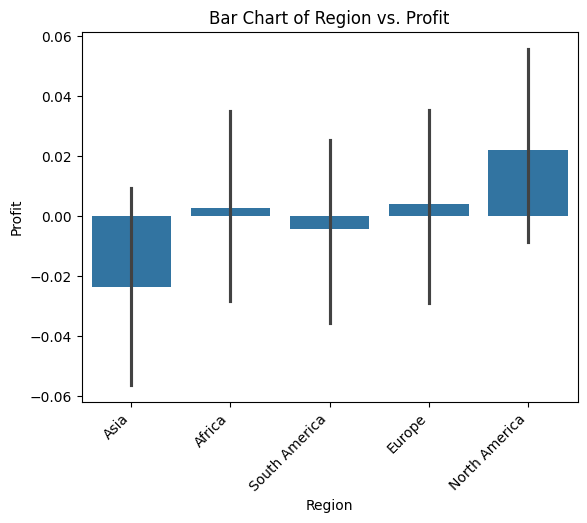

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Create the bar chart
sns.barplot(x="Region", y="Profit", data=df)

# Customize the chart (optional)
plt.title("Bar Chart of Region vs. Profit")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels if needed

# Display the chart
plt.show()

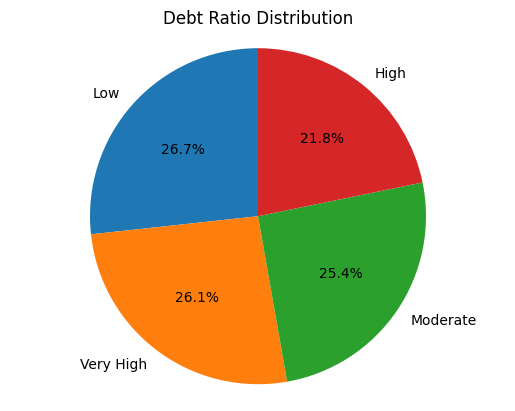

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Define bins for Debt_Ratio distribution
bins = [0, 0.25, 0.5, 0.75, 1]  # Customize bins as needed
labels = ['Low', 'Moderate', 'High', 'Very High']

# Categorize Debt_Ratio into bins
df['Debt_Ratio_Category'] = pd.cut(df['Debt_Ratio'], bins=bins, labels=labels)

# Calculate distribution of categories
distribution = df['Debt_Ratio_Category'].value_counts()

# Create the pie chart
plt.pie(distribution.values, labels=distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Debt Ratio Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

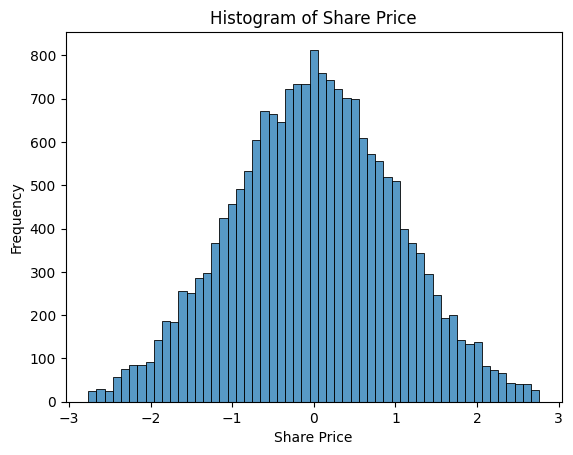

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Create the histogram
sns.histplot(data=df, x="Share_Price")

# Customize the chart (optional)
plt.title("Histogram of Share Price")
plt.xlabel("Share Price")
plt.ylabel("Frequency")

# Display the chart
plt.show()